In [1]:
import numpy as np
from termcolor import colored

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


In [2]:
# 데이터 셋 만들기
n_train = 1000

train_x = np.random.normal(0, 1, size=(n_train, 1)).astype(np.float32)
train_x_noise = train_x + 0.2 * np.random.normal(0, 1, size=(n_train, 1)) # noise를 주어 좀 더 현실적인 데이터 셋으로 만들기

train_y = (train_x_noise > 0).astype(np.int32)

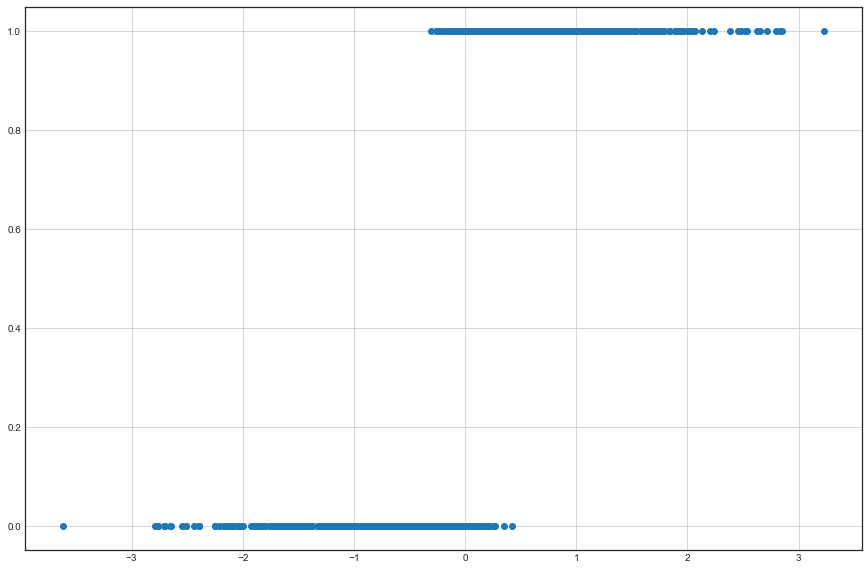

In [3]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(train_x, train_y)
ax.tick_params(labelsize=10)
ax.grid()
plt.show()

In [4]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(n_train).batch(8)

In [5]:
model = Sequential()
model.add(Dense(units=2, activation='softmax'))

loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate=0.1)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

EPOCHS = 10

for epoch in range(EPOCHS):
  for x, y in train_ds:
    with tf.GradientTape() as tape:
      predictions = model(x)
      loss = loss_object(y, predictions)
      
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_acc(y, predictions)
    
  print(colored('Epoch: ', 'red', 'on_white'), epoch + 1)
  
  template = 'Train Loss: {:.4f}\t Train Accuracy: {:.2f}%\n'
  print(template.format(train_loss.result(), train_acc.result() * 100))

Epoch:  1
Train Loss: 0.3180	 Train Accuracy: 93.00%

Epoch:  2
Train Loss: 0.2603	 Train Accuracy: 93.40%

Epoch:  3
Train Loss: 0.2331	 Train Accuracy: 93.63%

Epoch:  4
Train Loss: 0.2167	 Train Accuracy: 93.70%

Epoch:  5
Train Loss: 0.2053	 Train Accuracy: 93.82%

Epoch:  6
Train Loss: 0.1969	 Train Accuracy: 93.85%

Epoch:  7
Train Loss: 0.1905	 Train Accuracy: 93.89%

Epoch:  8
Train Loss: 0.1852	 Train Accuracy: 93.90%

Epoch:  9
Train Loss: 0.1809	 Train Accuracy: 93.90%

Epoch:  10
Train Loss: 0.1773	 Train Accuracy: 93.92%



In [6]:
train_loss = Mean()

loss1 = tf.constant(1)
train_loss(loss1)
print(train_loss.result())

tf.Tensor(1.0, shape=(), dtype=float32)


In [7]:
loss2 = tf.constant(2)
train_loss(loss2)
print(train_loss.result())

tf.Tensor(1.5, shape=(), dtype=float32)


In [8]:
loss3 = tf.constant(3)
train_loss(loss3)
print(train_loss.result())

tf.Tensor(2.0, shape=(), dtype=float32)


In [9]:
train_loss = Mean()

t1 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t1:
  train_loss(t)
  print(train_loss.result())

print('\n')

t2 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t2:
  train_loss(t)
  print(train_loss.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


tf.Tensor(3.142857, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.1, shape=(), dtype=float32)
tf.Tensor(3.2727273, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


t1과 t2를 독립적으로 계산을 해야하지만 누적되어 계산된 것을 확인할 수 있다.

In [10]:
train_loss = Mean()

t1 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t1:
  train_loss(t)
  print(train_loss.result())

print('\n')

train_loss.reset_states()
t2 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t2:
  train_loss(t)
  print(train_loss.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


reset_states()을 사용함으로써 t1을 계산하고 초기화를 한 뒤에 t2가 계산된 것을 확인할 수 있다.

In [11]:
model = Sequential()
model.add(Dense(units=2, activation='softmax'))

loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate=0.1)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

EPOCHS = 10

for epoch in range(EPOCHS):
  for x, y in train_ds:
    with tf.GradientTape() as tape:
      predictions = model(x)
      loss = loss_object(y, predictions)
      
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_acc(y, predictions)
    
  print(colored('Epoch: ', 'red', 'on_white'), epoch + 1)
  
  template = 'Train Loss: {:.4f}\t Train Accuracy: {:.2f}%\n'
  print(template.format(train_loss.result(), train_acc.result() * 100))
  
  train_loss.reset_states()
  train_acc.reset_states()

Epoch:  1
Train Loss: 0.5065	 Train Accuracy: 79.40%

Epoch:  2
Train Loss: 0.2089	 Train Accuracy: 94.20%

Epoch:  3
Train Loss: 0.1815	 Train Accuracy: 94.10%

Epoch:  4
Train Loss: 0.1687	 Train Accuracy: 94.30%

Epoch:  5
Train Loss: 0.1609	 Train Accuracy: 93.90%

Epoch:  6
Train Loss: 0.1557	 Train Accuracy: 94.00%

Epoch:  7
Train Loss: 0.1520	 Train Accuracy: 94.10%

Epoch:  8
Train Loss: 0.1493	 Train Accuracy: 94.00%

Epoch:  9
Train Loss: 0.1468	 Train Accuracy: 94.30%

Epoch:  10
Train Loss: 0.1452	 Train Accuracy: 94.10%



loss와 accuracy에 대해서 reset_states를 하지 않으면 epoch 마다 계산되어야 하는 loss와 accuracy가 누적되어 계산되기 때문에 정확한 학습결과를 볼 수 없다. 따라서, 각 epoch 마다 loss와 accuracy를 초기화하기 위해 반드시 reset_states를 해주어야 한다.